In [14]:
# Data Processing
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns   # plotting heatmap
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [18]:
# Get training data features and labels
training_data = pd.read_csv(f'{os.getcwd()}/dataset/training.csv')
training_data_Y = training_data['class']
training_data_X = training_data.drop(columns=['class'], axis=1)
# Get test data features and labels
testing_data = pd.read_csv(f'{os.getcwd()}/dataset/testing.csv')
testing_data_Y = testing_data['class']
testing_data_X = testing_data.drop(columns=['class'], axis=1)

Best hyperparameters: {'max_depth': 16, 'n_estimators': 367}


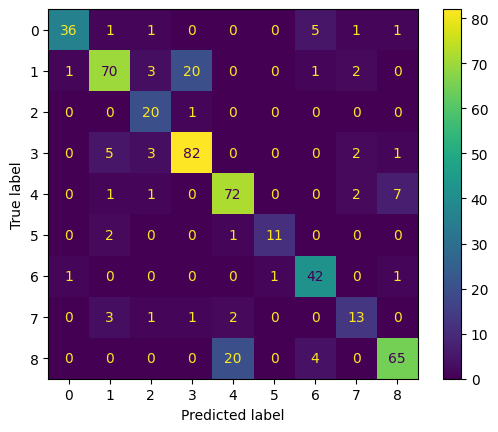

In [31]:
# Random Forrest Implementation (To be Continued)
rf = RandomForestClassifier()
rf.fit(training_data_X, training_data_Y)
predicted_y = rf.predict(testing_data_X)
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(training_data_X, training_data_Y)
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

#Confusion Matrix setup, prediction with the best models
predicted_ybest = best_rf.predict(testing_data_X)
# Create the confusion matrix
cm = confusion_matrix(testing_data_Y, predicted_ybest)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();